In [1]:
import pandas as pd
import numpy as np
import seaborn as snb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
%matplotlib inline

# Question No 1:

1. Estimate the mean of x and y

In [2]:
df=pd.read_csv("data.csv")# Read from a csv file
print(df)

     xi    yi
0   7.8  32.1
1   7.3  32.6
2   2.7  37.4
3   2.0  38.3
4   2.9  37.3
5   3.7  36.5
6   4.1  36.1
7   4.3  35.8
8   4.4  35.7
9   4.3  35.7
10  5.7  34.4
11  4.6  35.5
12  7.5  32.4
13  9.6  30.2


In [3]:
# Calculate the mean of x ie x_dash
x_dash=(round(df["xi"].sum(),2))/len(df["xi"])
print('Mean of x i:{}'.format(x_dash))

Mean of x i:5.064285714285715


In [4]:
# Calculate the mean of y ie y_dash
y_dash=(round(df["yi"].sum(),2))/len(df["yi"])
print('Mean of y i:{}'.format(y_dash))

Mean of y i:35.0


2. Calculate the covariance of x and y. and 3. Write an implementation with comments to calculate all results

In [5]:
#initialize the 2 lists with null
diff_y=[]
diffsq_y=[]
#Find yi-ybar value and (yi-ydash)^2 value
for i in df["yi"]:
    diff_y.append(i-y_dash)
    diffsq_y.append((i-y_dash)*(i-y_dash))
#Append yi-ybar column to data frame df 
df["yi-ybar"]=diff_y 

In [6]:
#initialize the 2 lists with null
diff_x=[]
diffsq_x=[]
#Find xi-xbar value and (xi-dash)^2 value
for i in df["xi"]:
    diff_x.append(i-x_dash)
    diffsq_x.append((i-x_dash)*(i-x_dash))
#Append xi-xbar (yi-ybar)^2  and (xi-xbar)^2 column to data frame df 
df["xi-xbar"]=diff_x
df["yi-ybarsq"]=diffsq_y
df["xi-xbarsq"]=diffsq_x

In [7]:
#Find the number of rows in column xi-xbar
limit=df["xi-xbar"].count()
#Find (xi-xbar)*(yi-ybar)
for i in range(1,limit):
    diff_xy=df["xi-xbar"]*df["yi-ybar"]
#Append ("xi-xbar")*("yi-ybar") column to data frame df 
df["diff_xy"]=diff_xy  
print(df)

     xi    yi  yi-ybar   xi-xbar  yi-ybarsq  xi-xbarsq    diff_xy
0   7.8  32.1     -2.9  2.735714       8.41   7.484133  -7.933571
1   7.3  32.6     -2.4  2.235714       5.76   4.998418  -5.365714
2   2.7  37.4      2.4 -2.364286       5.76   5.589847  -5.674286
3   2.0  38.3      3.3 -3.064286      10.89   9.389847 -10.112143
4   2.9  37.3      2.3 -2.164286       5.29   4.684133  -4.977857
5   3.7  36.5      1.5 -1.364286       2.25   1.861276  -2.046429
6   4.1  36.1      1.1 -0.964286       1.21   0.929847  -1.060714
7   4.3  35.8      0.8 -0.764286       0.64   0.584133  -0.611429
8   4.4  35.7      0.7 -0.664286       0.49   0.441276  -0.465000
9   4.3  35.7      0.7 -0.764286       0.49   0.584133  -0.535000
10  5.7  34.4     -0.6  0.635714       0.36   0.404133  -0.381429
11  4.6  35.5      0.5 -0.464286       0.25   0.215561  -0.232143
12  7.5  32.4     -2.6  2.435714       6.76   5.932704  -6.332857
13  9.6  30.2     -4.8  4.535714      23.04  20.572704 -21.771429


In [8]:
#Calculate the covariance sigma xy 
sigmaxy=sum(df["diff_xy"])/(df.shape[0]-1)
print(sigmaxy)

-5.192307692307692


# Question No 2

In [9]:
#Read csv file to dataframe df
df=pd.read_csv("Advertising.csv")
#check for null values
df.isna().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

In [10]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [11]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [12]:
df=df.drop(['Unnamed: 0'],axis=1)

In [13]:
df.shape

(200, 4)

<AxesSubplot:>

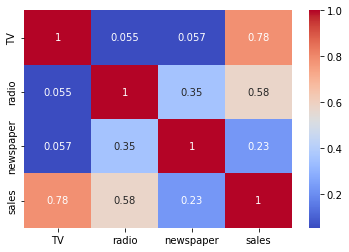

In [14]:
#To find correlation
import seaborn as sns
sns.heatmap(df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [15]:
#Find rows and colunms of df
df.shape

(200, 4)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# x value as Tv and y value as sales
x=df["TV"].to_numpy().reshape(-1,1)
y=df["sales"].to_numpy()
#Build linear reression model
model = LinearRegression().fit(x , y)

In [18]:
#Find the coefficient 
b=model.coef_[0]

In [19]:
#Find the intercept
a=model.intercept_

In [20]:
print("Equation for linear regression model:{}+{}*tv".format(a,b))

Equation for linear regression model:7.032593549127693+0.047536640433019764*tv


1. What is the error when the advertisement for TV is 286.0?

In [21]:
ypred_tv=model.predict([[286.0]])
print(ypred_tv)

[20.62807271]


In [22]:
yactual_tv=df["sales"].where(df["TV"]==286.0).dropna()
print ("the error when the advertisement for TV is 286.0 : {}".format(yactual_tv-ypred_tv))

the error when the advertisement for TV is 286.0 : 188   -4.728073
Name: sales, dtype: float64


In [23]:
# Find the predicted sales value for all the tv values
y_pred = model.predict(x)

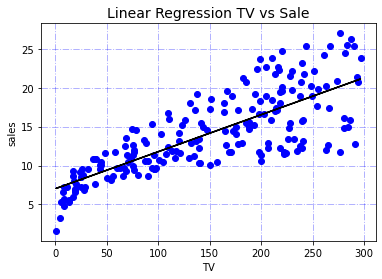

In [24]:
#Plot the x vs actual y
plt.scatter(x,y,color="blue")
#Plot the x vs predicted y
plt.plot(x,y_pred,color="black")
plt.title("Linear Regression TV vs Sale", fontsize=14) # set the title
plt.ylabel('sales') # set the y label
plt.xlabel('TV') # set the x label
plt.grid(color = "blue", linewidth = "1", linestyle = "-.", alpha=0.3)

2. Find the total Error between regression line and data points.

In [25]:
from sklearn.metrics import mean_absolute_error   
print("Mean Absolute Error: {}".format(mean_absolute_error(y, y_pred)))

Mean Absolute Error: 2.549806038927486


In [26]:
def mean_squared_error(y, y_pred):
    return (1 / len(y)) * np.sum((y - y_pred)**2)

In [27]:
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y, y_pred))))

Root Mean squared Error: 3.2423221486546887


3. What is linear regression model for TV sales if the advertisement is considered Radio only?

In [28]:
# x value as radio and y value as sales
x=df["radio"].to_numpy().reshape(-1,1)
y=df["sales"].to_numpy()
#build model
model = LinearRegression().fit(x , y)

In [29]:
b=model.coef_[0]
a=model.intercept_
print("Equation for linear regression model:{}+{}*radio".format(a,b))

Equation for linear regression model:9.311638095158283+0.20249578339243965*radio


In [30]:
# predit sales value of radio=13.9
ypred_rd=model.predict([[13.9]])
print(ypred_rd)

[12.12632948]


In [31]:
#Find the errors
yactual_rd=df["sales"].where(df["radio"]==13.9).dropna()
print ("The errors when the advertisement for radio is 13.9 : {}".format(yactual_rd-ypred_rd))

The errors when the advertisement for radio is 13.9 : 150    3.973671
188    3.773671
Name: sales, dtype: float64


In [32]:
#Find the RMSE of when the advertisement for radio is 13.9
np.sqrt((1 / len(yactual_rd)) * np.sum((yactual_rd-ypred_rd)**2))

3.8749610661400573

In [33]:
# Find the predicted sales value for all the radio values
y_pred = model.predict(x)

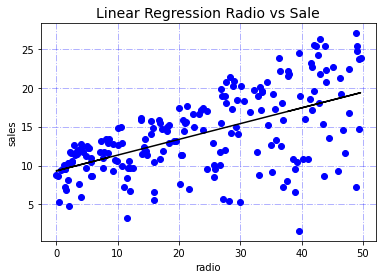

In [34]:
#Plot the x vs actual y
plt.scatter(x,y,color="blue")
#Plot the x vs predicted y
plt.plot(x,y_pred,color="black")
plt.title("Linear Regression Radio vs Sale", fontsize=14) # set the title
plt.ylabel('sales') # set the y label
plt.xlabel('radio') # set the x label
plt.grid(color = "blue", linewidth = "1", linestyle = "-.", alpha=0.3)

5. Find the total error between regression line and data points.

In [35]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y, y_pred))))

Root Mean squared Error: 4.2535159274564185


6. What is linear regression model for TV sales if the advertisement is considered
newspapers only?

In [36]:
x=df["newspaper"].to_numpy().reshape(-1,1)
y=df["sales"].to_numpy()
model = LinearRegression().fit(x , y)

In [37]:
b=model.coef_[0]
a=model.intercept_
print("Equation for linear regression model:{}+{}*newspaper".format(a,b))

Equation for linear regression model:12.35140706927816+0.05469309847227336*newspaper


In [38]:
# Find the predicted sales value for all the tv values
y_pred = model.predict(x)

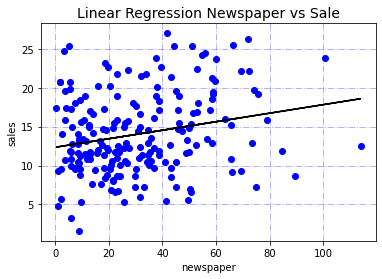

In [39]:
#Plot the x vs actual y
plt.scatter(x,y,color="blue")
#Plot the x vs predicted y
plt.plot(x,y_pred,color="black")
plt.title("Linear Regression Newspaper vs Sale", fontsize=14) # set the title
plt.ylabel('sales') # set the y label
plt.xlabel('newspaper') # set the x label
plt.grid(color = "blue", linewidth = "1", linestyle = "-.", alpha=0.3)

7. Design Multivariate Regression Model

In [40]:
#Define x and y values for multivariate linear regression model
x=df[["TV","radio","newspaper"]]
y=df.sales
multimodel=LinearRegression().fit(x,y)
#Find the intercept and coefficients
print(multimodel.intercept_)
print(multimodel.coef_)
cof=list(zip(['TV','radio','newspaper'],multimodel.coef_))

2.9388893694594067
[ 0.04576465  0.18853002 -0.00103749]


In [41]:
y_pred = multimodel.predict(x)

In [42]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y, y_pred)
print("Root Mean squared Error: {}".format(np.sqrt(mean_squared_error(y, y_pred))))

Root Mean squared Error: 1.6685701407225697


In [43]:
print("Equation of multilvariate linear regression:{}*TV+{}*radio+{}*newspaper+{}".format(cof[0][1],cof[1][1],cof[2][1],multimodel.intercept_))

Equation of multilvariate linear regression:0.04576464545539761*TV+0.18853001691820462*radio+-0.0010374930424762972*newspaper+2.9388893694594067


# Question No 3:

Question No 3.1:

In [44]:
#Read the cvs file to the dataframe
house_data=pd.read_csv("housing.csv",delimiter=r"\s+")
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [45]:
house_data.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [46]:
house_data.shape

(506, 14)

In [47]:
house_data[house_data.columns[0]].count()

506

In [48]:
len(house_data)

506

In [49]:
len(house_data.axes[1])

14

<AxesSubplot:>

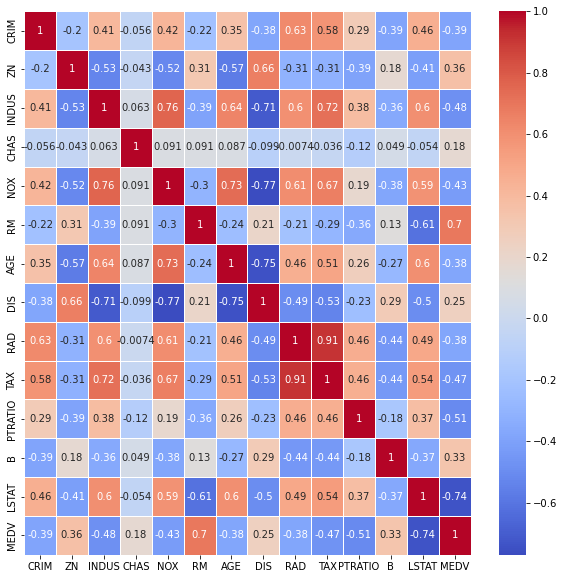

In [50]:
fig, ax = plt.subplots(figsize=(10,10))
snb.heatmap(house_data.corr(), annot = True, fmt='.2g',cmap= 'coolwarm', linewidths=.5,ax=ax)

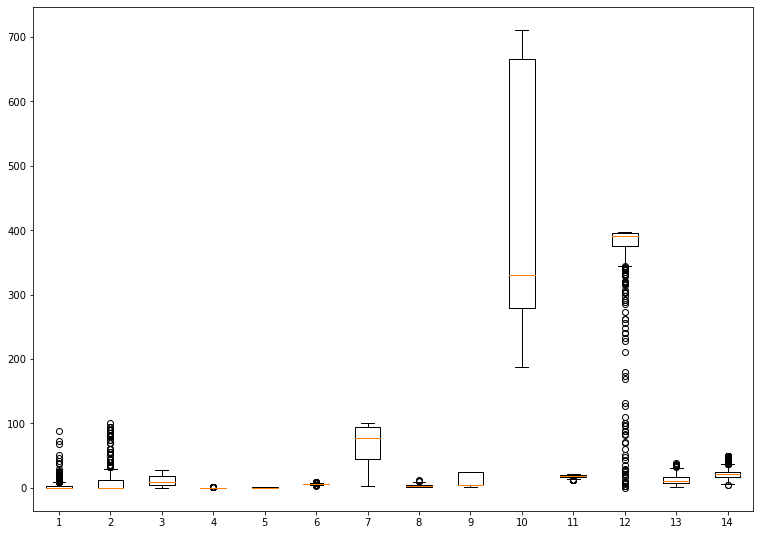

In [51]:
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
 
# Creating plot
boxplot = ax.boxplot(house_data)
 
# show plot
plt.show()

In [52]:
data_out=house_data 
for i in range(0,data_out.shape[1]-1):
    q1=data_out[data_out.columns[i]].quantile(.25)
    q3=data_out[data_out.columns[i]].quantile(.75)
    iqr=q3-q1
    data_out['outlier']=np.where(data_out[[data_out.columns[i]]]<(q1-1.5*iqr),0,
                             np.where(data_out[[data_out.columns[i]]]>(q3+1.5*iqr),0,1))
    print("{}:{}".format(data_out.columns[i],data_out[data_out.columns[i]].where(data_out["outlier"]==0).count()))

CRIM:66
ZN:68
INDUS:0
CHAS:35
NOX:0
RM:30
AGE:0
DIS:5
RAD:0
TAX:0
PTRATIO:15
B:77
LSTAT:7


In [53]:
house_data.median(axis=0)

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
MEDV        21.20000
outlier      1.00000
dtype: float64

In [54]:
house_data.mean(axis=0)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
MEDV        22.532806
outlier      0.986166
dtype: float64

In [55]:
house_data.quantile([.1, .25, .5, .75], axis = 0)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier
0.10,0.038195,0.0,2.91,0.0,0.427,5.5935,26.950,1.628300,3.0,233.0,14.75,290.2700,4.680,12.750,1.0
0.25,0.082045,0.0,5.19,0.0,0.449,5.8855,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025,1.0
0.50,0.256510,0.0,9.69,0.0,0.538,6.2085,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200,1.0
0.75,3.677083,12.5,18.10,0.0,0.624,6.6235,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000,1.0


Text(0, 0.5, 'AGE')

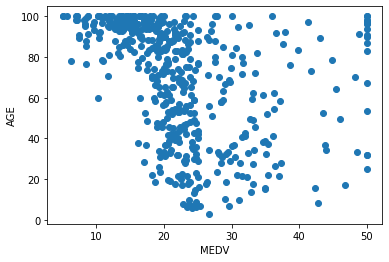

In [56]:
plt.scatter(house_data['MEDV'], house_data['AGE'])
plt.xlabel('MEDV')
plt.ylabel('AGE')

# K-means

In [57]:
# Run K-means algoorithm
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(house_data[['MEDV','AGE']])
y_predicted

array([0, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 1, 1, 1, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 2, 0, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 0, 2, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,

In [58]:
house_data['CLUSTER'] = y_predicted
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier,CLUSTER
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0,1,0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6,1,2
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4,1,0
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2,1,0


In [59]:
# Cluster centers
km.cluster_centers_

array([[24.952     , 61.1984    ],
       [27.1592    , 27.3688    ],
       [19.09257812, 92.296875  ]])

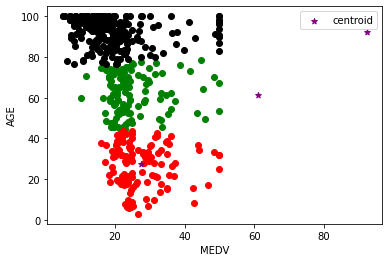

In [60]:
# Plot clusters and centroids
df1 = house_data[house_data.CLUSTER==0]
df2 = house_data[house_data.CLUSTER==1]
df3 = house_data[house_data.CLUSTER==2]

plt.scatter(df1.MEDV,df1['AGE'],color='green')
plt.scatter(df2.MEDV,df2['AGE'],color='red')
plt.scatter(df3.MEDV,df3['AGE'],color='black')

# Plot centers
plt.scatter(km.cluster_centers_[:,1],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('MEDV')
plt.ylabel('AGE')
plt.legend()

# data pre processing

In [61]:
# Import MinMaxScaler from sk preprocessing
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

scaler = MinMaxScaler()

# transform MEDV
scaler.fit(house_data[['MEDV']])
house_data['MEDV'] = scaler.transform(house_data[['MEDV']])

# transform AGE
scaler.fit(house_data[['AGE']])
house_data['AGE'] = scaler.transform(house_data[['AGE']])

In [62]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier,CLUSTER
0,0.00632,18.0,2.31,0,0.538,6.575,0.641607,4.0900,1,296.0,15.3,396.90,4.98,0.422222,1,0
1,0.02731,0.0,7.07,0,0.469,6.421,0.782698,4.9671,2,242.0,17.8,396.90,9.14,0.368889,1,2
2,0.02729,0.0,7.07,0,0.469,7.185,0.599382,4.9671,2,242.0,17.8,392.83,4.03,0.660000,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,0.441813,6.0622,3,222.0,18.7,394.63,2.94,0.631111,1,0
4,0.06905,0.0,2.18,0,0.458,7.147,0.528321,6.0622,3,222.0,18.7,396.90,5.33,0.693333,1,0


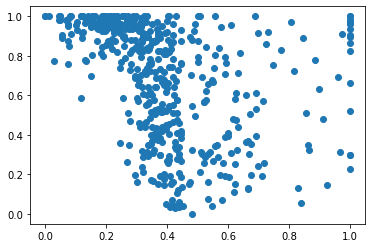

In [63]:
plt.scatter(house_data['MEDV'], house_data['AGE'])

In [64]:
# run K-means algorithm again after preprocessing
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(house_data[['MEDV','AGE']])
y_predicted

array([1, 1, 0, 2, 0, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2,
       1, 0, 1, 1, 2, 2, 1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 0, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [65]:
house_data['CLUSTER'] = y_predicted
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,outlier,CLUSTER
0,0.00632,18.0,2.31,0,0.538,6.575,0.641607,4.0900,1,296.0,15.3,396.90,4.98,0.422222,1,1
1,0.02731,0.0,7.07,0,0.469,6.421,0.782698,4.9671,2,242.0,17.8,396.90,9.14,0.368889,1,1
2,0.02729,0.0,7.07,0,0.469,7.185,0.599382,4.9671,2,242.0,17.8,392.83,4.03,0.660000,1,0
3,0.03237,0.0,2.18,0,0.458,6.998,0.441813,6.0622,3,222.0,18.7,394.63,2.94,0.631111,1,2
4,0.06905,0.0,2.18,0,0.458,7.147,0.528321,6.0622,3,222.0,18.7,396.90,5.33,0.693333,1,0


In [66]:
# Plot cernters after preproocessing
km.cluster_centers_

array([[0.79083333, 0.72436369],
       [0.2737381 , 0.87927394],
       [0.44831373, 0.3263464 ]])

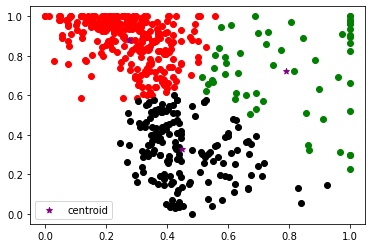

In [67]:
df1 = house_data[house_data.CLUSTER==0]
df2 = house_data[house_data.CLUSTER==1]
df3 = house_data[house_data.CLUSTER==2]

plt.scatter(df1.MEDV,df1['AGE'], color='green')
plt.scatter(df2.MEDV,df2['AGE'], color='red')
plt.scatter(df3.MEDV,df3['AGE'], color='black')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')
plt.legend()

# silhouette_score

In [68]:
data_XX = house_data.iloc[:,[6,13]].values
labels_km = km.labels_
score_km = metrics.silhouette_score(data_XX,labels_km)
print("Score of k-means = ", score_km)

Score of k-means =  0.547868415968652


In [69]:
sse = []
k_range = range(1,10)
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(house_data[['MEDV','AGE']])
    sse.append(km.inertia_)
sse

C:\Users\user\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


[63.53438953567569,
 27.032968393232913,
 17.6898935313976,
 12.724639459729417,
 10.226302381920348,
 8.009993915792968,
 6.805188019289371,
 6.017389009409534,
 5.242260162460232]

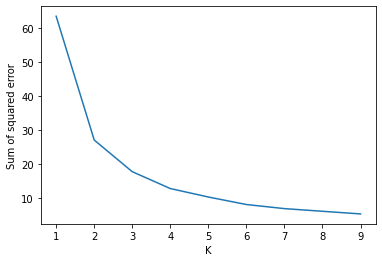

In [70]:
# plot the result of sse
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)

# DBSCAN

In [71]:
# dbscan clustering
from sklearn.cluster import DBSCAN
from numpy import unique
from numpy import where
data_X = house_data.iloc[:,[7,13]].values
data_X

array([[4.09      , 0.42222222],
       [4.9671    , 0.36888889],
       [4.9671    , 0.66      ],
       ...,
       [2.1675    , 0.42      ],
       [2.3889    , 0.37777778],
       [2.505     , 0.15333333]])

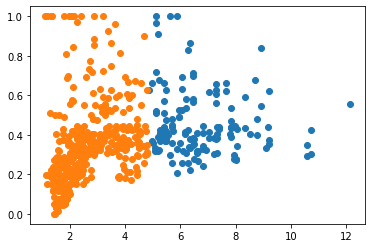

In [72]:
# define the model
model = DBSCAN(eps=0.7, min_samples=90)
# fit model and predict clusters
y_predicted = model.fit_predict(data_X)
# retrieve unique clusters
clusters = unique(y_predicted)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(y_predicted == cluster)
    # create scatter of these samples
    plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

# silhouette_score

In [73]:
labels_db = model.labels_
score_db = metrics.silhouette_score(data_X,labels_db)

print("Score of DBscan = ", score_db)

Score of DBscan =  0.6463133568166873


# Brich

Clusters of Birch [0 1 2]


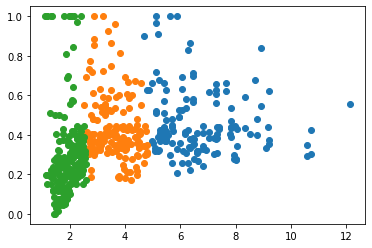

In [74]:
model_br = Birch(threshold=0.01, n_clusters=3)
model_br.fit(data_X)
yhat_br = model_br.predict(data_X)
clusters_br = unique(yhat_br)
print("Clusters of Birch",clusters_br)
# create scatter plot for samples from each cluster
for cluster in clusters_br:
    # get row indexes for samples with this cluster
    row_ix = where(yhat_br == cluster)
    # create scatter of these samples
    plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

# silhouette_score

In [75]:
score_br = metrics.silhouette_score(data_X,yhat_br)
print("Score of Birch = ", score_br)

Score of Birch =  0.5313091704412856


# Hirarchical clustering

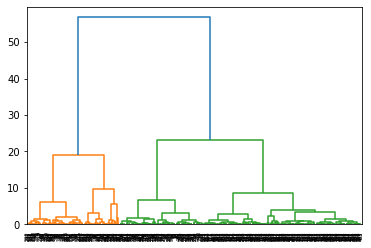

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

x = house_data['MEDV']
y = house_data['DIS']

data = list(zip(x, y))

linkage_data = linkage(data, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()


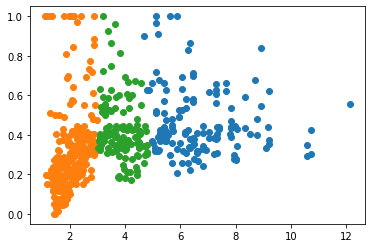

In [77]:
from sklearn.cluster import AgglomerativeClustering
data_X = house_data.iloc[:,[7,13]].values
hi_cluster=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
hi_cluster.fit_predict(data_X)
# retrieve unique clusters
clusters = unique(hi_cluster.labels_)
# create scatter plot for samples from each cluster
for cluster in clusters:
	# get row indexes for samples with this cluster
	row_ix = where(hi_cluster.labels_ == cluster)
	# create scatter of these samples
	plt.scatter(data_X[row_ix, 0], data_X[row_ix, 1])
# show the plot
plt.show()

# silhouette_score

In [78]:
score_hi = metrics.silhouette_score(data_X,hi_cluster.labels_ )

print("Score of Hierarchical clustering = ", score_hi)

Score of Hierarchical clustering =  0.546338683081147
